# Creating Enticing Visuals

## Introduction
Visuals describe data better than words. When done correctly, visuals can create an enticing environment for users to learn the discoveries from data science results. In this notebook, three visual models are explored based on anomalies determined in isolation forests: matplot lib 3D graphs, Bokeh plots for time series, and plotly for time series clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prep

from mpl_toolkits.mplot3d import Axes3D #for 3D plots

from sklearn.ensemble import IsolationForest as isoForest

#Import datasets with same time sample
timeSeries=pd.read_csv('../data/external/MarchAnalytics.csv')
timeSeries=timeSeries.drop(columns=['Unnamed: 0'])
timeSeries=timeSeries.set_index('timestamp')
timeSeries.head()


,CPU,ELB,Network
timestamp,,,
2014-04-10 00:04:00,0.901235,0.141985,0.000870
2014-04-10 00:09:00,0.938272,0.083969,0.012914
2014-04-10 00:14:00,0.913580,0.283969,0.001015
2014-04-10 00:19:00,0.925926,0.143511,0.000818
2014-04-10 00:24:00,0.925926,0.076336,0.000846


## Data
This data consists of CPU, ELB and networking measurments from Anomaly data in Amazon Cloud. This data was created by determining the number of attributes analyzed at the same times. Since this is an anomaly detection goal, clustering and time series must be shown.

The first graph is the original data without any applied model. This is clustered based on each of the three attributes. With a quick glance, a user can see the defined clusters.

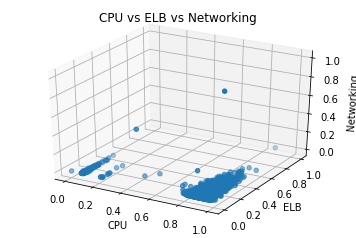

In [2]:
# 3D Scatter Plot
orig=np.array(timeSeries)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(orig[:, 0], orig[:, 1], orig[:, 2])
ax.set_xlabel('CPU')
ax.set_ylabel('ELB')
ax.set_zlabel('Networking')
ax.set_title('CPU vs ELB vs Networking')
plt.show()

## First Visual: MatPlotLib
Matplotlib can plot 3-D graphs with color coding based on the anomaly output. With the current color contrast, it is very easy to see the differing clusters defined by isolation clusters.

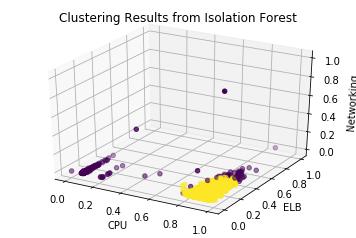

In [3]:
# fit the model
clf = isoForest()
clf.fit(orig)
anomalies = clf.predict(orig)

#Start plotting
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(orig[:, 0], orig[:, 1], orig[:, 2],c=anomalies)

ax.set_xlabel('CPU')
ax.set_ylabel('ELB')
ax.set_zlabel('Networking')
ax.set_title('Clustering Results from Isolation Forest')
plt.show()

## Second Visual: Bokeh Plots
The second model, Bokeh Plots, allows a user to zoom in and out of the graphs. Instead of clustering in 3-D space, I chose to use a timeline with clustering. This outputs the different clusters of each attribute compared to the others. By color coding, a user can see where certain attributes contain anomalous behavior.

In [4]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

output_notebook()

timeSeries.index=pd.to_datetime(timeSeries.index)
timeSeries.sort_index(inplace=True)

#First graph based on line plotting
p1=figure(x_axis_type='datetime', title="CPU vs ELB vs Network Utilization over Time")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Utilization'

p1.line(timeSeries.index,timeSeries['CPU'],color='#FB9A99', legend='CPU')
p1.line(timeSeries.index,timeSeries['ELB'],color='#A6CEE3', legend='ELB')
p1.line(timeSeries.index,timeSeries['Network'],color='#33A02C', legend='Network')
p1.legend.location = "top_left"
show(p1)

#Second graph of clustering
p=figure(x_axis_type='datetime', title="Scatter of CPU vs ELB vs Network Utilization over Time")
p.grid.grid_line_alpha=0.3
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Utilization'

p.scatter(timeSeries.index,timeSeries['CPU'],color='#FB9A99', legend='CPU')
p.scatter(timeSeries.index,timeSeries['ELB'],color='#A6CEE3', legend='ELB')
p.scatter(timeSeries.index,timeSeries['Network'],color='#33A02C', legend='Network')
p.legend.location = "top_left"

show(p)

Loading BokehJS ...

## Third Visual: Plotly
The last graph model is from plotly which uses d3.js. I plotted the time series and color coded based on the labelled anomalies from Isolation forests. This shows where the "bad" clusters exist in measurements. In this plot, the user can zoom and move the plot around, but differing from brokeh, the user can hover over the different points to see the labelled points and value.

In [5]:
#conda install -c anaconda plotly in anaconda cmd
import plotly as py
import plotly.graph_objs as go

#Place anomalies in dataframe and split
timeSeries['anomalies']=anomalies
regular=timeSeries[timeSeries.anomalies==1]
bad=timeSeries[timeSeries.anomalies==-1]

py.offline.init_notebook_mode(connected=True)
  
trace1 = go.Scatter(
    x=regular.index,
    y=regular.CPU,
    mode='lines',
    name='Good'
)

trace2 = go.Scatter(
    x=bad.index,
    y=bad.CPU,
    mode='markers',
    name='Anomalies'
)

data=[trace1,trace2]

layout = go.Layout(
    title='Isolation Forest Anomaly Clusters',
    xaxis=dict(title='Date'),
    yaxis=dict(title='CPU Utilization')
)
    
newPlot=go.Figure(data=data, layout=layout)
    
py.offline.iplot(newPlot)

## References
https://bokeh.pydata.org/en/latest/docs/gallery/stocks.html
https://plot.ly/python/3d-scatter-plots/
https://plot.ly/~wymok/38/anomaly-detections-for-realtraffictraveltime-387csv/#/code     